# Relatório de análise VIII
## Identificando e removendo outliers

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

In [6]:
dados = pd.read_csv('aluguel_residencial.csv',sep=';')
dados.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


<AxesSubplot:>

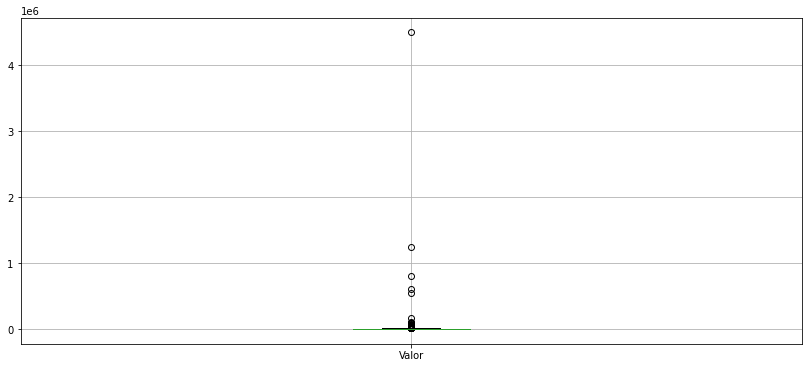

In [7]:
dados.boxplot(['Valor'])

In [8]:
dados[dados['Valor']>=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [9]:
valor = dados['Valor']

In [10]:
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: Valor, Length: 21826, dtype: float64

In [12]:
Q1 = valor.quantile(.25)
Q1

1600.0

In [13]:
Q3 = valor.quantile(.75)
Q3

5500.0

In [14]:
IIQ = Q3 - Q1
IIQ

3900.0

In [15]:
limite_inferior = Q1 - 1.5*IIQ
limite_inferior

-4250.0

In [17]:
limite_superior = Q3 + 1.5*IIQ
limite_superior

11350.0

In [20]:
selecao = (valor>=limite_inferior) & (valor<=limite_superior)
selecao

0        True
1        True
2        True
3        True
4        True
         ... 
21821    True
21822    True
21823    True
21824    True
21825    True
Name: Valor, Length: 21826, dtype: bool

In [23]:
dados_new = dados[selecao]

<AxesSubplot:>

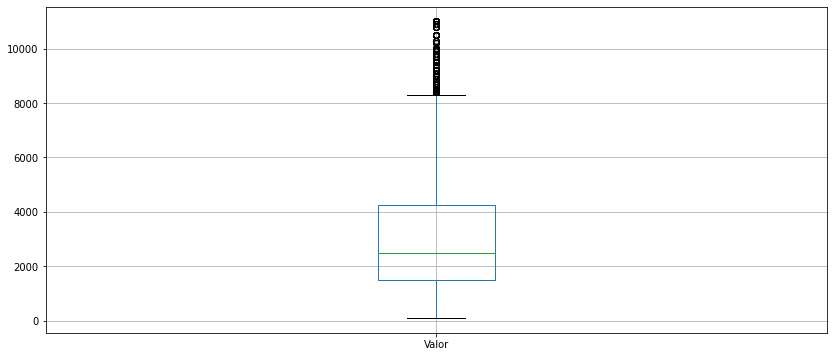

In [24]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

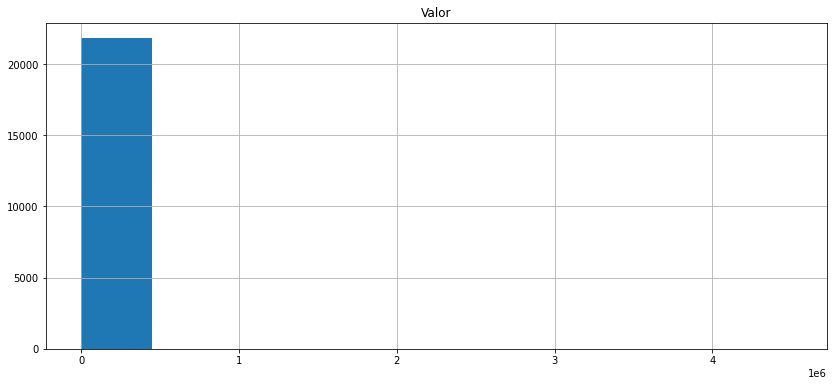

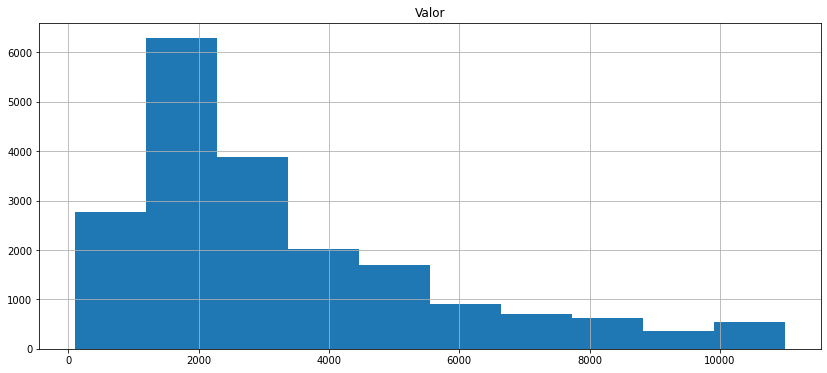

In [25]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

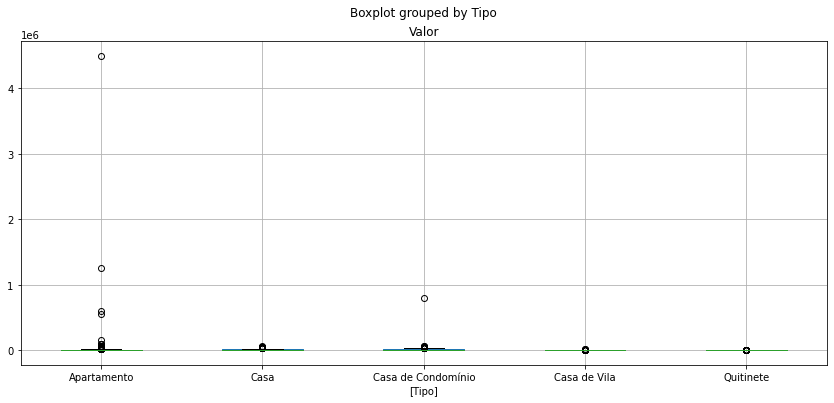

In [26]:
dados.boxplot(['Valor'],by=['Tipo'])

In [28]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [29]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [30]:
Q1 = grupo_tipo.quantile(.25)
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [31]:
Q2 = grupo_tipo.quantile(.75)

In [32]:
Q2

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [33]:
IIQ = Q2 - Q1
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [35]:
limite_inferior = Q1 - 1.5 * IIQ
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [36]:
limite_superior=Q2 + 1.5 * IIQ
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [44]:
limite_superior['Apartamento']
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [57]:

dados_new=pd.DataFrame()
for tipo in grupo_tipo.groups.keys():    
    eh_tipo = dados['Tipo'] == tipo     
    eh_dentro_limite = (dados['Valor']>=limite_inferior[tipo])&(dados['Valor']<=limite_superior[tipo])    
    selecao = eh_tipo & eh_dentro_limite
    print(dados[selecao])
    dados_selecao = dados[selecao]
    print(dados_selecao)
    dados_new = pd.concat([dados_new,dados_selecao])


Tipo                Bairro  Quartos  Vagas  Suites  Area  \
2      Apartamento                Centro        1      0       0    15   
3      Apartamento          Higienópolis        1      0       0    48   
4      Apartamento              Cachambi        2      0       0    50   
7      Apartamento                Grajaú        2      1       0    70   
8      Apartamento   Lins de Vasconcelos        3      1       1    90   
...            ...                   ...      ...    ...     ...   ...   
21819  Apartamento        Vila Valqueire        2      0       0    52   
21821  Apartamento                 Méier        2      0       0    70   
21823  Apartamento           Jacarepaguá        3      1       2    78   
21824  Apartamento  São Francisco Xavier        2      1       0    48   
21825  Apartamento                Leblon        2      0       0    70   

        Valor  Condominio  IPTU  Valor m2 Tipo Agregado  
2       800.0       390.0  20.0     53.33   Apartamento  
3       8

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

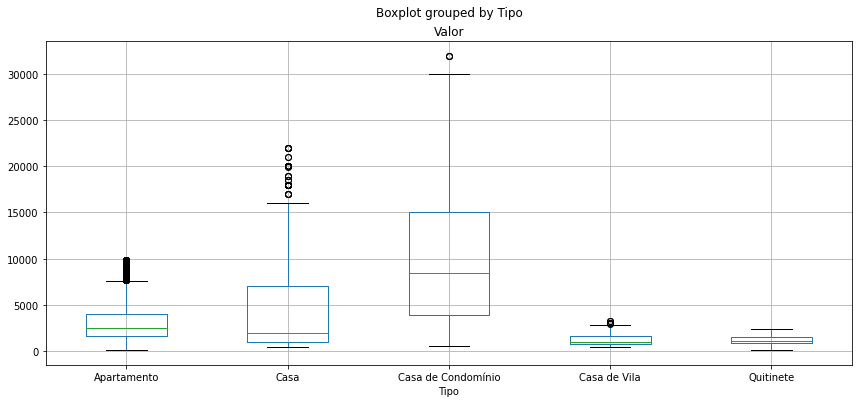

In [59]:
dados_new.boxplot(['Valor'],by='Tipo')

In [60]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv',sep=';',index=False)